## [範例重點]

了解隨機森林的建模方法及其中超參數的意義

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV  

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20, max_depth=4)

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9736842105263158


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.06111021 0.01127107 0.52057254 0.40704618]


## 作業

試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？

改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [6]:
# 讀取wine資料集
wine = datasets.load_wine()

X = wine.data
y = wine.target

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)


# Grid Search - to find best parameter set
from sklearn.model_selection import GridSearchCV  
# 建立模型
clf = RandomForestClassifier(random_state = 87, n_jobs=-1)


# 列出參數組合
param_grid = {"criterion" : ["entropy", "gini"],
              "max_depth" : [4,6,8,10],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [2,5,10],
              "n_estimators" : [50, 100], # 使用 n 顆樹
              "max_features" : ['auto', 'sqrt'], # 如何選取 features
              "oob_score" : [True]
             }
gs = GridSearchCV(estimator = RandomForestClassifier(random_state = 87),
                  param_grid = param_grid,
                  cv = 5,
                  scoring = "accuracy")
gs.fit(X_train, y_train)
print("best_score  : %s" % gs.best_score_)
print("best_params : %s \n" % gs.best_params_)

# 建立由目前training set找出最佳參數組合的模型
clf = gs.best_estimator_

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

best_score  : 0.9838709677419355
best_params : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'oob_score': True} 

Acuuracy:  0.9629629629629629


/Users/johnsonhuang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
# 1. feature_importances_
print("feature_importances_ : \n%s\n " % (clf.feature_importances_))

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import numpy as np

#Load the dataset
names = wine.feature_names
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train, y_train)
print("Features sorted by their score:")

a = sorted(zip(map(lambda x: round(x, 10), clf.feature_importances_), names), reverse=True)
ind = np.arange(0, len(list(a)), 1)
for i in ind :
    print(a[i])

# bar plot the  feature_importances_
import numpy as np
import matplotlib.pyplot as plt


width = 0.5
plt.barh(ind, clf.feature_importances_, width, facecolor = "dodgerblue", align='center', alpha = 0.75)
plt.title("Features sorted by their score:")
# yticks
plt.yticks(ind, names)

ax = plt.gca()
plt.show()    

print("\n")

# 2. accuracy
print("accuracy = %f " % (clf.score(X_train, y_train)))

feature_importances_ : 
[0.13356712 0.03414842 0.00719719 0.03003084 0.01300849 0.0697054
 0.17408136 0.01211203 0.01072792 0.20886514 0.04403277 0.10421
 0.15831333]
 
Features sorted by their score:
(0.2088651387, 'color_intensity')
(0.1740813605, 'flavanoids')
(0.1583133344, 'proline')
(0.1335671169, 'alcohol')
(0.1042099953, 'od280/od315_of_diluted_wines')
(0.0697053958, 'total_phenols')
(0.0440327673, 'hue')
(0.0341484152, 'malic_acid')
(0.0300308435, 'alcalinity_of_ash')
(0.013008494, 'magnesium')
(0.0121120285, 'nonflavanoid_phenols')
(0.0107279203, 'proanthocyanins')
(0.0071971896, 'ash')


<Figure size 640x480 with 1 Axes>



accuracy = 1.000000 


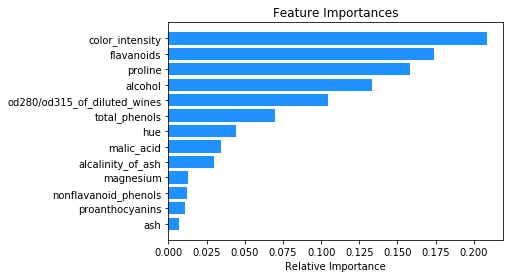

In [8]:
features = wine['feature_names']
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 參考資料

## 知名 ML youtuber 教你手刻隨機森林 by Python

影片連結：https://www.youtube.com/watch?v=QHOazyP-YlM